  ## **Machine learning project based on concrete strengt prediction .**



In [ ]:
#importing dataset
import pandas as pd
df=pd.read_csv("/content/Concrete-strength_data.csv")
df.head(10)

,Cement,Blast_furn_slag,Fly_Ash,Water,Superplasticizer,Coarse_Agg,fine_Agg,Age (day),concrete_strength
0,540.0,1.0,1.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,1.0,1.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,1.0,228.0,1.0,932.0,594.0,270,40.27
3,332.5,142.5,1.0,228.0,1.0,932.0,594.0,365,41.05
4,198.6,132.4,1.0,192.0,1.0,978.4,825.5,360,44.30
5,266.0,114.0,1.0,228.0,1.0,932.0,670.0,90,47.03
6,380.0,95.0,1.0,228.0,1.0,932.0,594.0,365,43.70
7,380.0,95.0,1.0,228.0,1.0,932.0,594.0,28,36.45
8,266.0,114.0,1.0,228.0,1.0,932.0,670.0,28,45.85
9,475.0,1.0,1.0,228.0,1.0,932.0,594.0,28,39.29


# **Exploratory Data analysis**

Cement               0.0
Blast_furn_slag      0.0
Fly_Ash              0.0
Water                0.0
Superplasticizer     0.0
Coarse_Agg           0.0
fine_Agg             0.0
Age (day)            0.0
concrete_strength    0.0
dtype: float64


<Axes: >

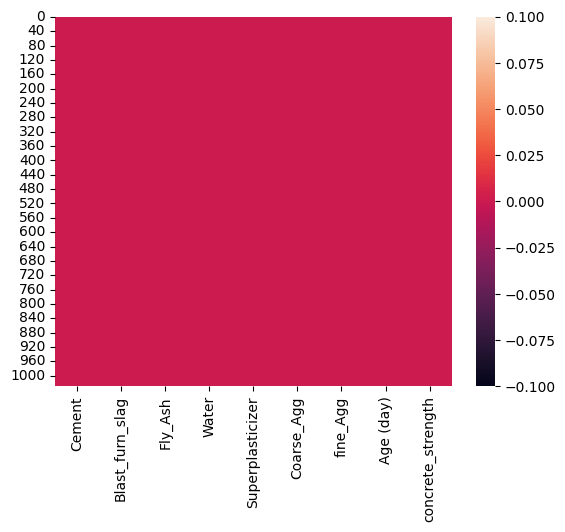

In [ ]:
#null value analysis
import seaborn as sns #visualization lib.
import matplotlib.pyplot as plt #visualization lib.
print(df.isna().mean()*100)
sns.heatmap(df.isna(),color='Purple')

In [ ]:
df.describe()

,Cement,Blast_furn_slag,Fly_Ash,Water,Superplasticizer,Coarse_Agg,fine_Agg,Age (day),concrete_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,74.353107,54.737864,181.567282,6.572621,972.918932,773.580485,45.662136,35.817961
std,104.506364,85.887864,63.531503,21.354219,5.599017,77.753954,80.175980,63.169912,16.705742
min,102.000000,1.000000,1.000000,121.800000,1.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,1.000000,1.000000,164.900000,1.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,1.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: >

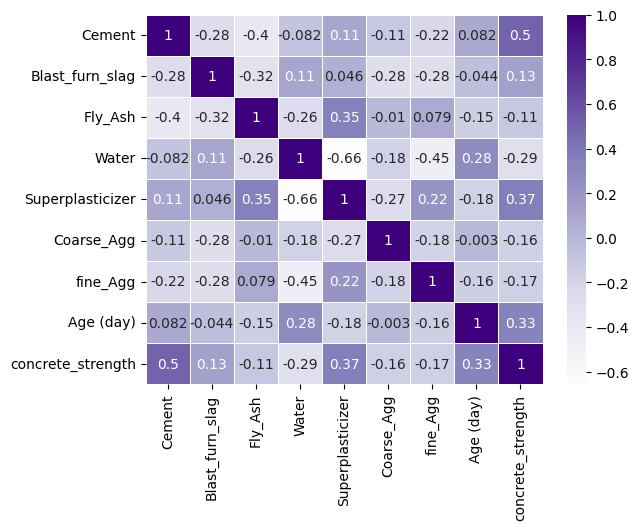

In [ ]:
#coorelation map
sns.heatmap(df.corr(), cmap='Purples', annot = True,linewidth=0.5)

In [ ]:
# for ignoring waring and show max rows and columns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None,'display.max_columns',None)

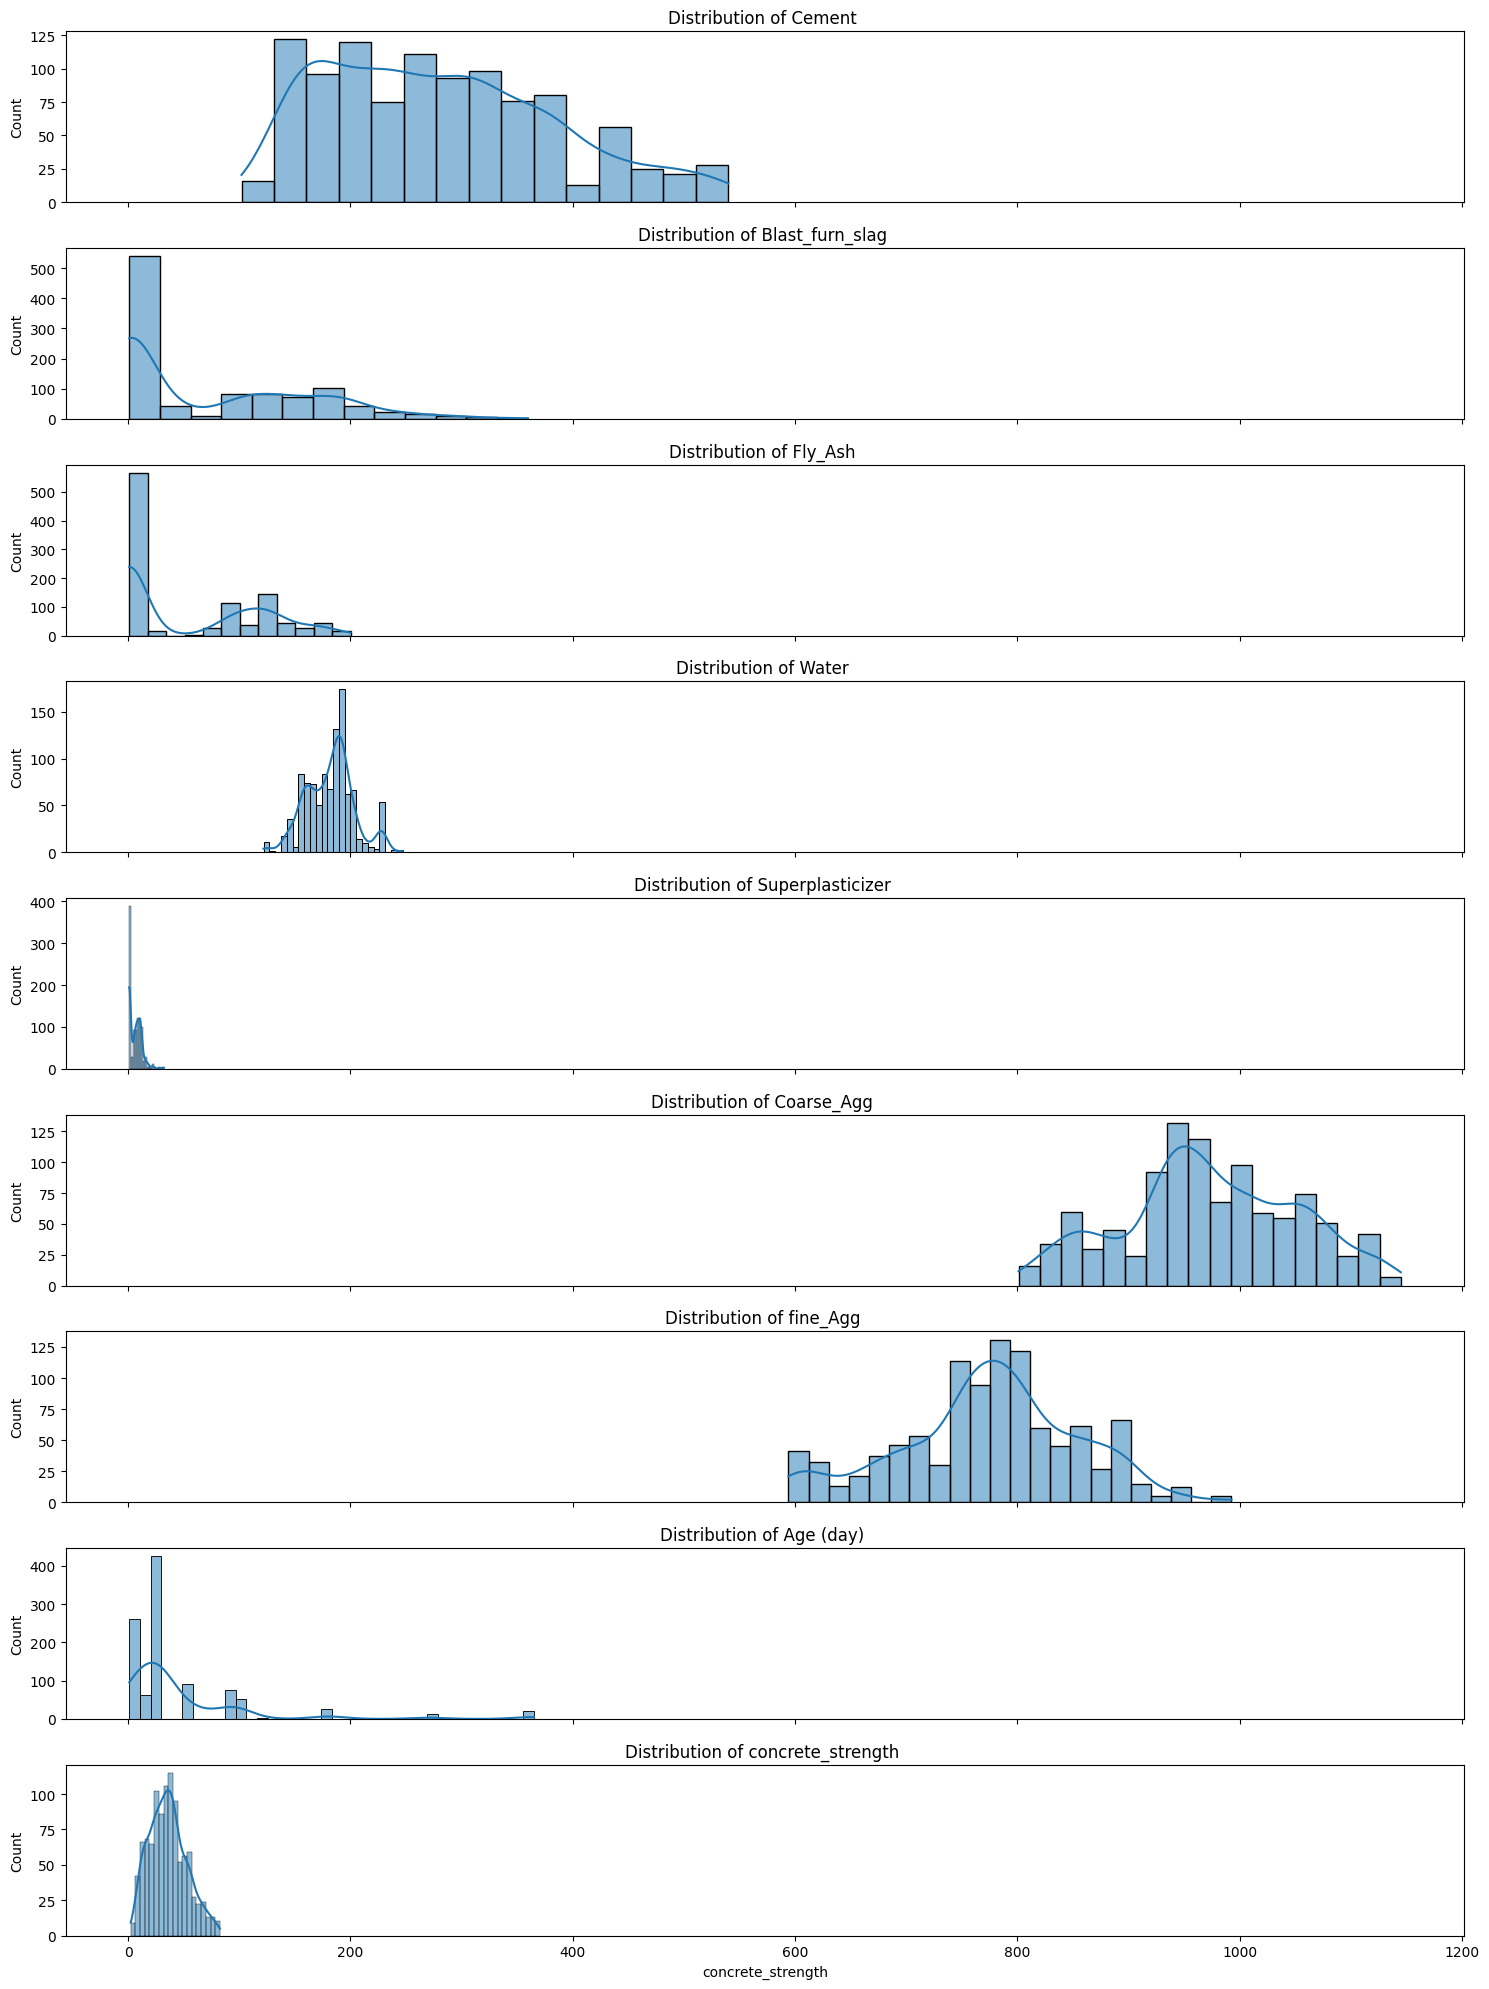

In [ ]:
# Select the  numerical columns for distribution plots
selected_columns = ['Cement', 'Blast_furn_slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Agg', 'fine_Agg', 'Age (day)','concrete_strength']
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(15, 20), sharex=True)
for i, column in enumerate(selected_columns):
    sns.histplot(data=df, x=column, multiple='stack', ax=axes[i], kde=True, palette='Set1')
    axes[i].set_title(f'Distribution of {column} ')
plt.tight_layout()
plt.show()

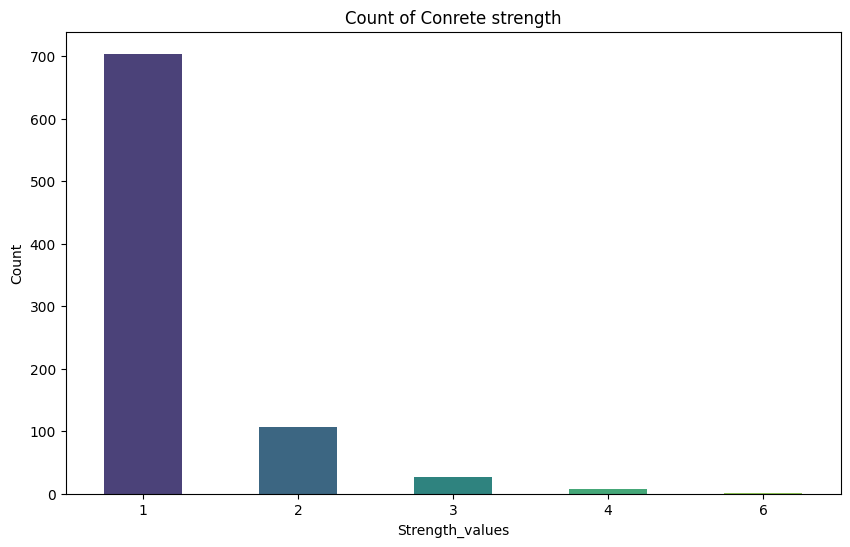

In [ ]:
concrete_strength = df['concrete_strength'].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(x=concrete_strength, palette='viridis', width=0.5)
plt.title('Count of Conrete strength')
plt.xlabel('Strength_values')
plt.ylabel('Count')
plt.show()

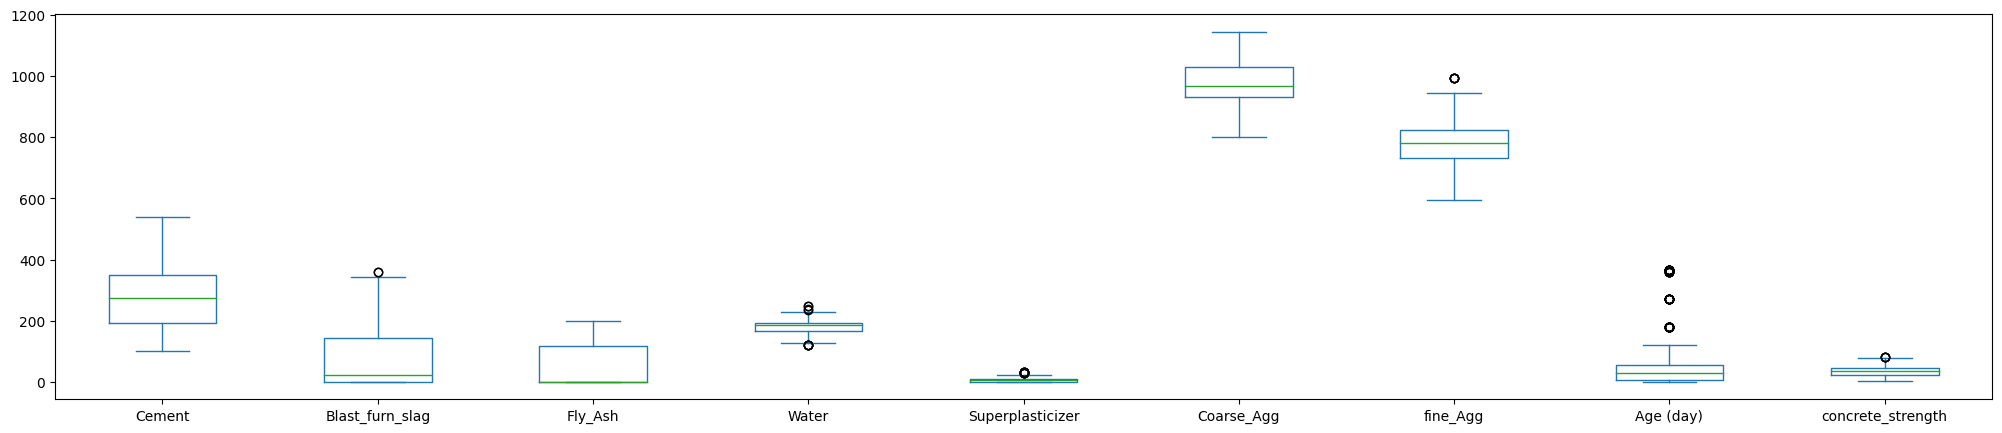

In [ ]:
#outlier analyzing
n1=['Cement', 'Blast_furn_slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Agg', 'fine_Agg', 'Age (day)','concrete_strength']
df[n1].plot.box(figsize=(25,5))
plt.xticks(rotation='horizontal')
plt.show()

<Axes: >

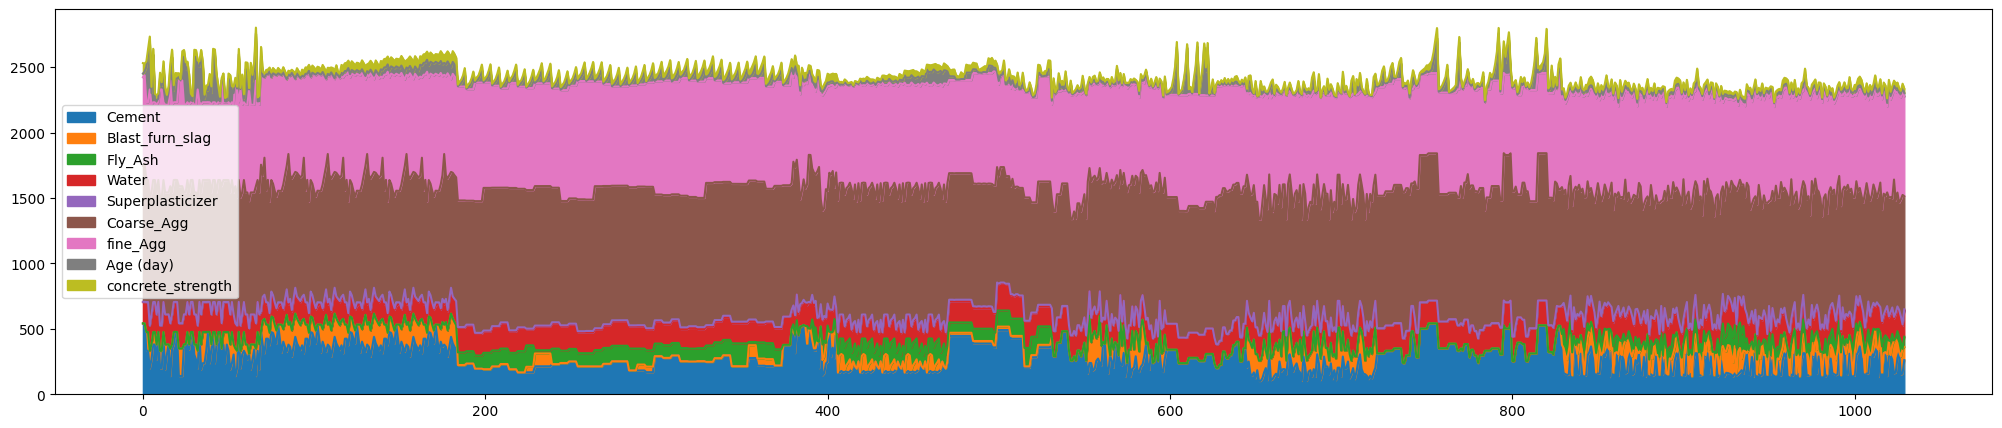

In [ ]:
#ratio between each measurement
selected_columns = ['Cement', 'Blast_furn_slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Agg', 'fine_Agg', 'Age (day)','concrete_strength']

df[selected_columns].plot.area( figsize=(25,5))

# **Data cleaning and preprocessing**


*  Dropping duplicate values
*  Impute missing values if they are missing at ramdom
*  Removal of outliers
*  Encode Categorical Features.
*  Split dataset into training and test set
*  Feature Scaling.
*  Deal with imbalanced Data.(mainly )



In [ ]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
#shapes after dropping duplicates
df.shape

(1005, 9)

In [ ]:
import numpy as np    #because if we consider zero then it is equivalent to NaN value so it is good to convert them in one
df.replace(0.0,1.0, inplace=True)

In [ ]:
df.isnull().mean()*100

Cement               0.0
Blast_furn_slag      0.0
Fly_Ash              0.0
Water                0.0
Superplasticizer     0.0
Coarse_Agg           0.0
fine_Agg             0.0
Age (day)            0.0
concrete_strength    0.0
dtype: float64

In [ ]:
n1 = df[['fine_Agg','Blast_furn_slag', 'Age (day)','Water', 'Superplasticizer','concrete_strength']]
per25 = n1.quantile(0.25)
per75 = n1.quantile(0.75)
iqr = per75 - per25
#  upper and lower limits
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

# Filter out rows with values outside the limits
outliers = n1[(n1 >= lower_limit) & (n1 <= upper_limit)]

print("Percentile 25:")
print(per25)
print("\nPercentile 75:")
print(per75)
print("\nIQR:")
print(iqr)
print("\nUpper Limit:")
print(upper_limit)
print("\nLower Limit:")
print(lower_limit)

Percentile 25:
fine_Agg             724.30
Blast_furn_slag        1.00
Age (day)              7.00
Water                166.60
Superplasticizer       1.00
concrete_strength     23.52
Name: 0.25, dtype: float64

Percentile 75:
fine_Agg             822.20
Blast_furn_slag      142.50
Age (day)             56.00
Water                192.90
Superplasticizer      10.00
concrete_strength     44.87
Name: 0.75, dtype: float64

IQR:
fine_Agg              97.90
Blast_furn_slag      141.50
Age (day)             49.00
Water                 26.30
Superplasticizer       9.00
concrete_strength     21.35
dtype: float64

Upper Limit:
fine_Agg             969.050
Blast_furn_slag      354.750
Age (day)            129.500
Water                232.350
Superplasticizer      23.500
concrete_strength     76.895
dtype: float64

Lower Limit:
fine_Agg             577.450
Blast_furn_slag     -211.250
Age (day)            -66.500
Water                127.150
Superplasticizer     -12.500
concrete_strength     -8.505

In [ ]:
#these code show that the given dataset lose given value after applying limit in the dataset
n1 = df[['fine_Agg','Blast_furn_slag', 'Age (day)','Water', 'Superplasticizer','concrete_strength']]

shapes_after_limits = {}
for column in n1.columns:
    column_outliers = n1[(n1[column] >= lower_limit[column]) & (n1[column] <= upper_limit[column])]
    shapes_after_limits[column] = column_outliers.shape
for column, shape in shapes_after_limits.items():
    print(f"Shape of {column} after applying limits:", shape)

Shape of fine_Agg after applying limits: (1000, 6)
Shape of Blast_furn_slag after applying limits: (1003, 6)
Shape of Age (day) after applying limits: (946, 6)
Shape of Water after applying limits: (990, 6)
Shape of Superplasticizer after applying limits: (995, 6)
Shape of concrete_strength after applying limits: (997, 6)


In [ ]:
n1 = df[['fine_Agg','Blast_furn_slag', 'Age (day)','Water', 'Superplasticizer','concrete_strength']]
per25 = n1.quantile(0.25)
per75 = n1.quantile(0.75)
iqr = per75 - per25
#  upper and lower limits
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr
for i in n1.columns:
  for i in n1.columns:
    df = df[(df[i] >= lower_limit[i]) & (df[i] <= upper_limit[i])]

In [ ]:
df.shape

(911, 9)

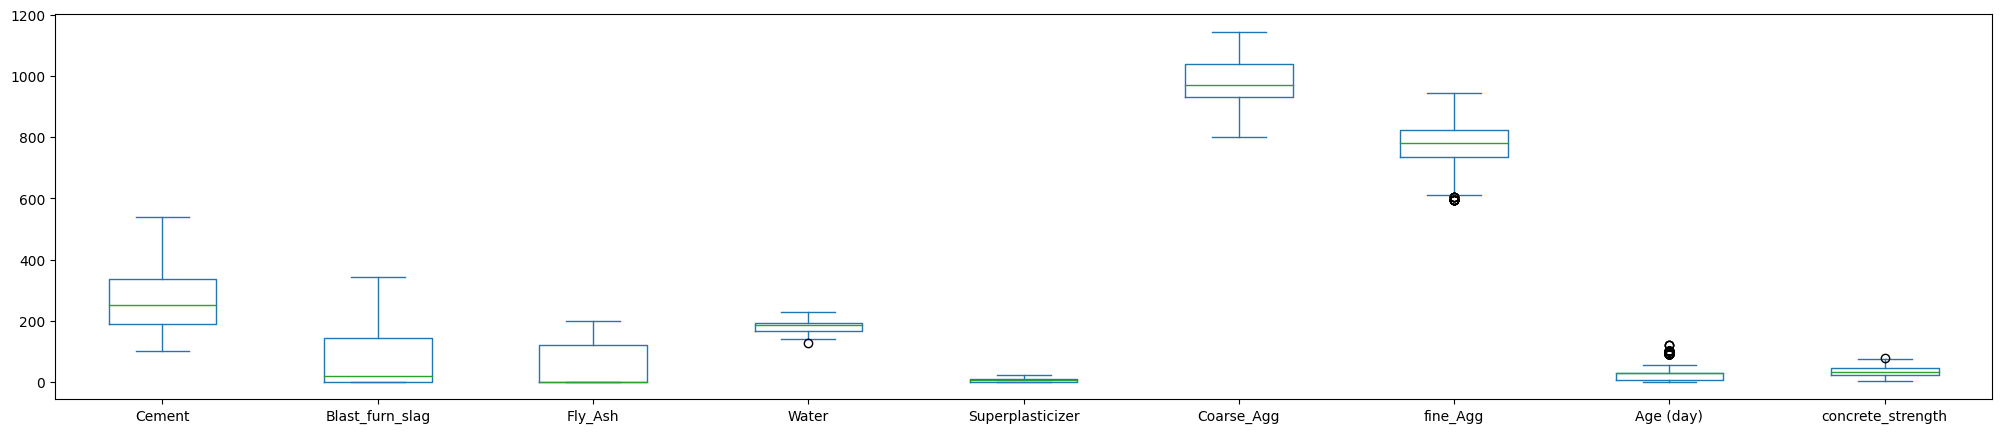

In [ ]:
#after outlier removal we get value
#outlier analyzing
df.plot.box(figsize=(25,5))
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
#Spliting dataset into train and test
from sklearn.model_selection import train_test_split

In [ ]:
x=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((728, 8), (183, 8), (183,), (728,))

In [ ]:
#scaling -standardization is more robust to outliers and can create a more representative distribution.

#**Features Engineering**

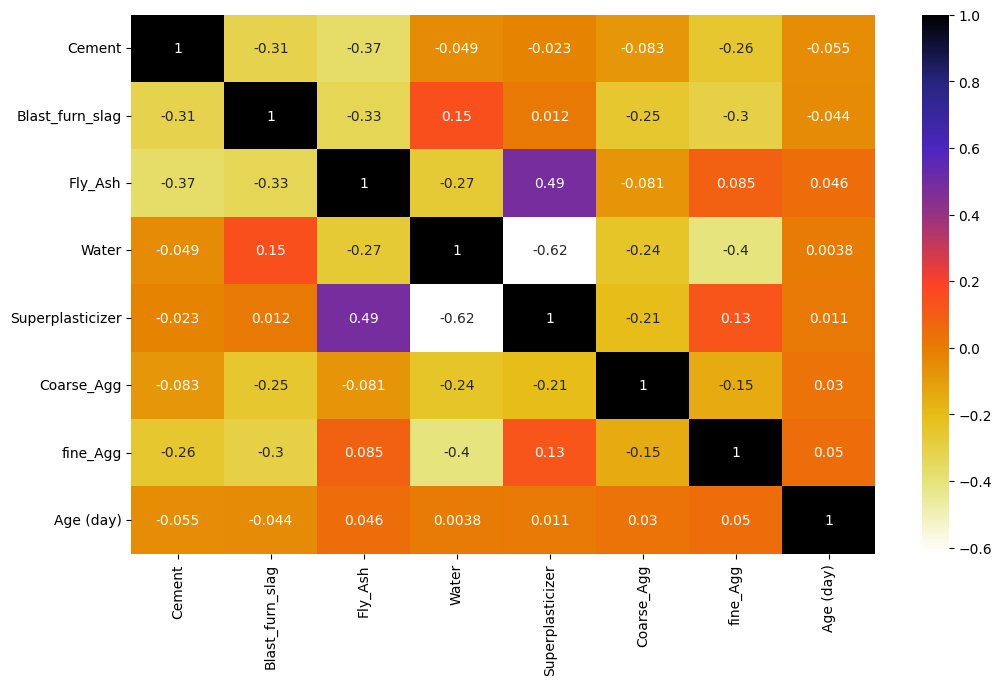

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,7))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
#Feature selection

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [ ]:
corr_features = correlation(x_train, 0.5)
len(set(corr_features))

1

According to one analysis, concrete with 30% fly ash and superplasticizer is 34.19% stronger than concrete without fly ash. Superplasticizers can also shorten the hydration induction period of cement-fly ash cementitious material and reduce the exothermic rate of the hydration exothermic peak

In [ ]:
corr_features

{'Superplasticizer'}

In [ ]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
#Features Scaling  and all the thing would be run in columns transformer;
from sklearn.preprocessing import MinMaxScaler
mi=MinMaxScaler()

x_train_scale=mi.fit_transform(x_train)
x_test_scale=mi.transform(x_test)

#**Model Selection**

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error

In [ ]:
#these are the linner regression and regularizations algorithms
"""
# Linear Regression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8160311078493554
47.989600538277365

# Ridge
reg = Ridge(alpha=0.1)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8160311006578206
47.98960241424064

# Lasso
reg = Lasso(alpha=0.01)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8160271000222876
47.990646008616196

# elastic-net
reg1 = ElasticNet(alpha=0.01)
reg1.fit(x_train,y_train)
y_pred = reg1.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8160288428116014
47.990191389566135


from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9261531052885221
19.263490347564375

from sklearn.tree import DecisionTreeRegressor
rft=DecisionTreeRegressor()
rft.fit(x_train,y_train)
y_pred = rft.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.818236122775269
47.414406633272606

from sklearn.ensemble import GradientBoostingRegressor
gr=GradientBoostingRegressor(**params)
gr.fit(x_train,y_train)
y_pred =gr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9280515992997818
18.768254614177142
"""


'\n# Linear Regression\nreg = LinearRegression()\nreg.fit(x_train,y_train)\ny_pred = reg.predict(x_test)\nprint(r2_score(y_test,y_pred))\nprint(mean_squared_error(y_test,y_pred))\n\n0.8160311078493554\n47.989600538277365\n\n# Ridge\nreg = Ridge(alpha=0.1)\nreg.fit(x_train,y_train)\ny_pred = reg.predict(x_test)\nprint(r2_score(y_test,y_pred))\nprint(mean_squared_error(y_test,y_pred))\n\n0.8160311006578206\n47.98960241424064\n\n# Lasso\nreg = Lasso(alpha=0.01)\nreg.fit(x_train,y_train)\ny_pred = reg.predict(x_test)\nprint(r2_score(y_test,y_pred))\nprint(mean_squared_error(y_test,y_pred))\n\n0.8160271000222876\n47.990646008616196\n\n# elastic-net\nreg1 = ElasticNet(alpha=0.01)\nreg1.fit(x_train,y_train)\ny_pred = reg1.predict(x_test)\nprint(r2_score(y_test,y_pred))\nprint(mean_squared_error(y_test,y_pred))\n\n0.8160288428116014\n47.990191389566135\n\n\nfrom sklearn.ensemble import RandomForestRegressor\nrf=RandomForestRegressor()\nrf.fit(x_train,y_train)\ny_pred = rf.predict(x_test)\nprin

#**HyperParameter Tunning & Model Evalution**

In [ ]:
params = {
    "n_estimators":400,
    "max_depth": 8,
    "min_samples_split": 9,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg=GradientBoostingRegressor(**params)
reg.fit(x_train_scale, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test_scale))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 17.6631


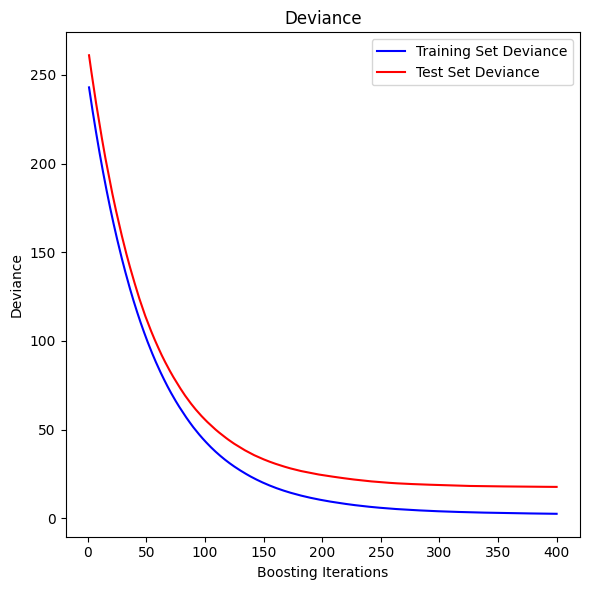

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test_scale)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBRegressor

In [ ]:
#setting the parameters
regressor=XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,0.85,1]
## Hyper Parameters
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5,7, 10,13, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20,0.25]
min_child_weight=[1,2,3,4,5,6]
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs =-1,
            verbose =5,
            return_train_score =True,
            random_state=42)

In [ ]:
random_cv.fit(x_train_scale,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 0.85,
                                                       1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25],
                                        'max_depth': [2, 3, 5, 7, 10, 13, 15],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [ ]:
random_cv.estimator

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=np.nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None)

In [ ]:
regressor.fit(x_train_scale, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predic=regressor.predict(x_test_scale)
print(predic)

[39.335632  30.752848  18.513773  34.926777  49.629665  10.246688
 48.942665  22.118889  58.4532    37.84422   24.788954  26.28983
 34.052483  47.869446  11.337648  37.828163  20.260212  36.278553
 22.496883  58.713856  46.617603  12.760795   5.30526   46.08793
 64.03158   52.167465  32.177296  60.967197  10.871825  39.309113
 27.727476  18.095036  22.069288  50.082825  29.680586  47.904507
 19.650507  29.048016  18.04392   20.092478  32.874615  46.980453
 23.545769  10.584227  39.92877   18.956964  35.81582   50.21583
 38.247444  10.527842  51.00833   24.062891  27.303627  12.375282
 43.740772  47.386208  40.134148  25.234999  17.556673  30.170465
 41.149376  19.818964  19.200941  31.55445   10.268645  36.16592
 51.01688   48.20837   54.180946  28.575195  43.78735   55.356834
 15.8511915 53.077232  17.356287  32.733074   8.243067  33.44684
 24.230661  49.75277   40.42063   41.480587  36.249832  43.925102
 27.100641  56.631733  62.642815  17.508635   9.895962  48.69173
 19.14308   50.3

In [ ]:
from sklearn.model_selection import cross_val_score #crossval score
score=cross_val_score(regressor,x_train_scale ,y_train,cv=10)
score.mean()

0.8961263456679708

In [ ]:
#model export
import pickle

In [ ]:
pickle.dump(regressor,open('model_regressor.pkl','wb'))
pickle.dump(mi,open('scaling_mi.pkl','wb'))